# 2-11. 프로젝트 (1) load_digits : 손글씨를 분류해 봅시다 💝

## (1) 필요한 모듈 import하기 

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## (2) 데이터 준비

In [4]:
digit = load_digits()

print(dir(digit))
# dir()는 객체가 어떤 변수와 메서드를 가지고 있는지 나열함

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


▶ digits에 어떤 정보들이 담겨있을지 확인

In [5]:
digit.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

## (3) 데이터 이해하기

1. Feature Data 지정하기

In [6]:
digit_data = digit.data

print(digit_data.shape) 
#shape는 배열의 형상정보를 출력

(1797, 64)


In [7]:
# 샘플로 하나의 데이터 확인
digit_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

2. Label Data 지정하기

In [8]:
digit_label = digit.target
print(digit_label.shape)
digit_label

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

3. Target Names 출력해 보기

In [9]:
digit.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

4. 데이터 Describe 해 보기

In [10]:
print(digit.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [11]:
# print(digit.feature_names)

**이미지 확인해보기**

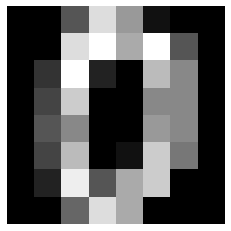

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# 64개의 데이터를 (8, 8)로 reshape
plt.imshow(digit.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

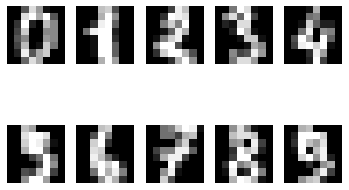

In [14]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digit.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [21]:
digit_label = digit.target
print(digit_label.shape)
digit_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## (4) train, test 데이터 분리

In [15]:
X_train, X_test, y_train, y_test = train_test_split(digit_data, 
                                                    digit_label, 
                                                    test_size=0.2, 
                                                    random_state=15)

- 데이터 잘 만들어졌는지 확인하기

In [16]:
X_train.shape, y_train.shape

((1437, 64), (1437,))

In [17]:
X_test.shape, y_test.shape

((360, 64), (360,))

In [18]:
y_train, y_test

(array([6, 4, 3, ..., 8, 8, 6]),
 array([9, 4, 4, 1, 2, 6, 4, 2, 5, 1, 5, 6, 8, 6, 6, 6, 4, 6, 1, 3, 3, 5,
        2, 6, 7, 5, 4, 3, 7, 3, 9, 0, 4, 6, 8, 7, 1, 8, 7, 9, 8, 0, 4, 9,
        3, 8, 7, 6, 7, 2, 8, 9, 3, 1, 2, 8, 6, 4, 8, 4, 2, 9, 5, 0, 9, 5,
        8, 3, 4, 4, 6, 4, 9, 0, 0, 3, 2, 4, 4, 5, 2, 7, 1, 6, 3, 1, 3, 1,
        2, 0, 7, 2, 5, 0, 5, 2, 9, 2, 9, 7, 0, 1, 0, 1, 6, 3, 8, 8, 2, 7,
        8, 3, 9, 7, 1, 3, 4, 6, 0, 6, 9, 6, 5, 1, 2, 9, 2, 5, 0, 6, 8, 8,
        2, 4, 7, 6, 4, 7, 7, 9, 6, 5, 9, 2, 1, 6, 6, 6, 9, 0, 9, 5, 1, 8,
        7, 2, 9, 4, 1, 6, 8, 8, 8, 9, 2, 4, 0, 5, 5, 0, 3, 2, 5, 4, 8, 4,
        1, 2, 0, 7, 9, 7, 4, 1, 8, 0, 2, 4, 5, 1, 9, 6, 8, 2, 5, 6, 6, 5,
        2, 5, 7, 6, 5, 0, 5, 2, 8, 3, 4, 8, 1, 4, 2, 4, 1, 0, 7, 3, 4, 8,
        8, 9, 1, 2, 4, 4, 4, 1, 2, 4, 9, 1, 9, 2, 1, 6, 6, 4, 4, 9, 9, 1,
        0, 6, 5, 9, 4, 5, 7, 0, 9, 5, 2, 7, 9, 5, 9, 9, 5, 0, 7, 9, 7, 6,
        2, 5, 5, 8, 7, 8, 7, 6, 2, 2, 8, 5, 7, 1, 1, 1, 3, 0, 2, 3, 1, 7,
     

## (5) 다양한 모델로 학습시켜보기

1. Decision Tree 사용해 보기

In [19]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)  # test 데이터로 예측

print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        31
           1       0.82      0.82      0.82        38
           2       0.72      0.87      0.79        38
           3       0.85      0.81      0.83        27
           4       0.97      0.78      0.86        41
           5       0.82      0.89      0.85        35
           6       0.85      0.89      0.87        38
           7       0.91      0.91      0.91        34
           8       0.74      0.74      0.74        35
           9       0.83      0.79      0.81        43

    accuracy                           0.84       360
   macro avg       0.85      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360



array([[29,  0,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0, 31,  3,  1,  1,  0,  1,  0,  1,  0],
       [ 0,  1, 33,  1,  0,  1,  0,  0,  1,  1],
       [ 0,  0,  0, 22,  0,  1,  1,  0,  2,  1],
       [ 0,  0,  0,  1, 32,  0,  4,  3,  0,  1],
       [ 0,  0,  3,  0,  0, 31,  0,  0,  1,  0],
       [ 0,  1,  2,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 31,  0,  2],
       [ 0,  2,  3,  0,  0,  2,  0,  0, 26,  2],
       [ 0,  3,  2,  0,  0,  2,  0,  0,  2, 34]])

2. Random Forest 사용해 보기

In [45]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        31
           1       0.95      0.97      0.96        38
           2       1.00      1.00      1.00        38
           3       1.00      0.96      0.98        27
           4       0.95      1.00      0.98        41
           5       0.97      1.00      0.99        35
           6       1.00      0.95      0.97        38
           7       1.00      1.00      1.00        34
           8       0.94      0.97      0.96        35
           9       1.00      0.98      0.99        43

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



array([[29,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 26,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 42]])

3. SVM 사용해 보기

In [46]:
from sklearn import svm
svm_model = svm.SVC()

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.95      1.00      0.97        38
           2       1.00      1.00      1.00        38
           3       0.96      0.96      0.96        27
           4       0.98      0.98      0.98        41
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        34
           8       0.97      0.94      0.96        35
           9       0.98      0.98      0.98        43

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



array([[30,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 26,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 42]])

4. SGD Classifier 사용해 보기

In [47]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.88      0.97      0.93        38
           2       1.00      0.97      0.99        38
           3       0.92      0.89      0.91        27
           4       0.98      0.98      0.98        41
           5       0.95      1.00      0.97        35
           6       1.00      0.97      0.99        38
           7       1.00      1.00      1.00        34
           8       0.94      0.91      0.93        35
           9       0.98      0.93      0.95        43

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 24,  0,  1,  0,  0,  1,  1],
       [ 0,  1,  0,  0, 40,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  2,  1,  0,  0,  0,  0, 40]])

5. Logistic Regression 사용해 보기

In [48]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.95      0.97      0.96        38
           2       1.00      0.97      0.99        38
           3       0.96      0.93      0.94        27
           4       0.98      1.00      0.99        41
           5       0.97      0.97      0.97        35
           6       1.00      0.97      0.99        38
           7       1.00      1.00      1.00        34
           8       0.92      0.97      0.94        35
           9       0.98      0.95      0.96        43

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 25,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 41]])

> Random Forest 모델과 Support Vector Machine (SVM)이 98%의 정확도로 가장 높게 나오는 것으로 보인다.

## (6) 모델을 평가해 보기
- Precision, Negative Predictive Value, Sensitivity, Specificity, Accuracy 
- 대표적인 성능지표: 정밀도(Precision), 재현율(Recall, Sensitivity), F1 스코어(f1 score=Recall과 Precision의 조화평균)

---

**보충설명**

1. 정확도(Accuracy)

In [32]:
# 정확도(Accuracy) 간단히 확인
from sklearn.metrics import accuracy_score  # 성능 평가에 대한 함수 모여있는 패키지

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8416666666666667

2. 정답과 오답을 구분하여 표현하는 방법을 오차 행렬(confusion matrix)

In [40]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 25,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 41]])

> TP=31, FN=0에 가까움, FP=0에 가까움, TN=41
> TP와 TN의 값이 비교적 크고 FN과 FP의 값이 작다는 것은 Precision, Recall의 값이 크다는 뜻으로 좋은 성능을 가진 모델이다.

3. classification_report로 Precision, Recall, F1 score 지표를 한 번에 확인

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.95      0.97      0.96        38
           2       1.00      0.97      0.99        38
           3       0.96      0.93      0.94        27
           4       0.98      1.00      0.99        41
           5       0.97      0.97      0.97        35
           6       1.00      0.97      0.99        38
           7       1.00      1.00      1.00        34
           8       0.92      0.97      0.94        35
           9       0.98      0.95      0.96        43

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360



---

## 모델 성능 평가지표 중 적절한 것 + 이유

- 분류 문제는 빈도가 중요하고, 회귀문제는 평균이 중요하다고 했으므로, 
    macro avg과 weighted avg는 고려하지 않았습니다. 

- 각 모델별로 Precision, Recall, F1 score, Accuracy 지표를 확인해 본 결과 
    **Support Vector Machine (SVM)** 모델이 가장 성능이 좋은 것을 확인할 수 있었습니다.
    
- 처음에 Accuracy로만 판단해보았을 때는, Random Forest 모델과 Support Vector Machine (SVM) 
    두 모델이 98%의 정확도로 가장 좋은 성능을 가진 것으로 보였으나,

- 앞서 학습자료에 정확도로만 평가하면 함정이 발생할 수 있으며 
    특히, 불균형한 데이터, unbalanced 데이터에서 나타난다고 한 바 있습니다. 

- 즉, 정확도는 정답의 분포에 따라 모델의 성능을 잘 평가하지 못하는 척도가 될 수 있으므로 
    Precision, Recall, f1-score값을 모두 고려하고자 했고, 
    confusion matrix에서 2X2가 아니지만 대각선에 있는 값 외에 오차라고 한다면,
    TP, TN의 값이 비교적 크고, FN, FP의 값이 작은 모델이 좋은 성능을 가진 모델이라고 판단하고자 했습니다.
    
- **Support Vector Machine (SVM)** 모델은 위 지표들로 평가한 결과 가장 우수한 성능을 가진 모델이라고 판단하여 선택하였습니다.



## 회고
<!-- - 이번 프로젝트에서 **어려웠던 점,**
- 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**.
- 루브릭 평가 지표를 맞추기 위해 **시도한 것들**.
- 만약에 루브릭 평가 관련 지표를 **달성 하지 못했을 때, 이유에 관한 추정**.
- **자기 다짐** -->

- 각각 머신러닝 모델을 완전히 이해하지 못한 상태에서 사이킷런 패키지를 불러와 사용하다보니, 어떤 원리로 어떻게 학습을 시키고 있는 것인지 직관적으로 이해하는 것이 어려웠다 --> 추가적인 공부 필요
- 정확도로만 성능을 판별하는 것이 부정확할 수 있다 생각하여 다른 지표들로 평가하려고 했으나, 지표가 비슷하게 나와 가장 우수한 성능의 모델을 딱 뽑아내기가 어려웠다 --> 성능 평가에 대해 더 학습하고 싶습니다...직접 함수를 짠다거나 이러한 방법에 대해 배우고 싶습니다...(도움 필요)
- 그래도 이렇게 데이터를 가지고 머신러닝 모델을 학습 - 검증 - 테스트 할 줄 아는 사람이 되었다는 것이 참 뿌듯합니다. 재밌게 공부하려구요~

  
`감사합니다 *^^*`